In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
from torch.optim.lr_scheduler import OneCycleLR
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Modular Code Imports

In [2]:
from data_augmentation import normalize_calculation,data_augmentation
from data_loader import data_download, data_loading
from visualize import class_image, show_misclassified_img, show_accuracy_loss
from helper import model_summary
from model import Net,train,test
import model

# Selecting the device type

In [3]:
SEED = 1
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
# For reproducibility
torch.manual_seed(SEED)
if cuda:
    torch.cuda.manual_seed(SEED)

CUDA Available? True


# Data Augmentation

In [4]:
mean,std = normalize_calculation(datasets.CIFAR10)
print("Mean - ", mean,"  ","Standard Deviation - ",std)

Files already downloaded and verified
Mean -  [0.49139968 0.48215841 0.44653091]    Standard Deviation -  [0.24703223 0.24348513 0.26158784]


In [5]:
train_transforms, test_transforms = data_augmentation(mean, std)

# Loading and Transforming the train/test data using data loader

In [6]:
train_data, test_data, classes = data_download(train_transforms, test_transforms)

Files already downloaded and verified
Files already downloaded and verified
Unique classes of images are: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [7]:
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=128)
train_loader, test_loader = data_loading(train_data, test_data,dataloader_args)

# Images from each class in the CIFAR10 dataset

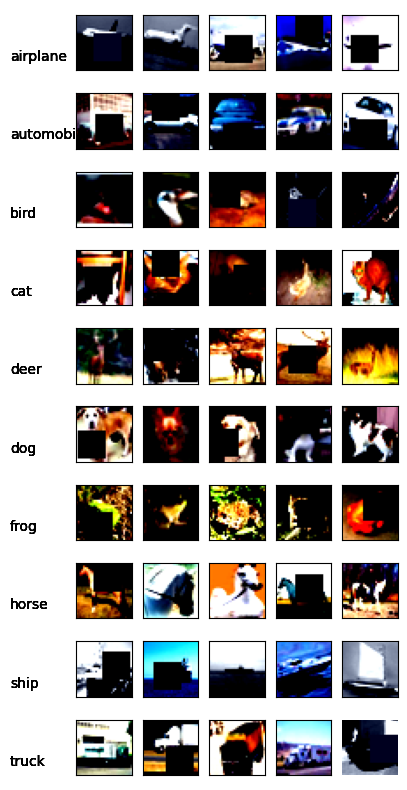

In [8]:
class_image(train_data,classes)

# Setting GPU as device and model calling

In [9]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
model_summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 16, 16]             432
              ReLU-2           [-1, 16, 16, 16]               0
       BatchNorm2d-3           [-1, 16, 16, 16]              32
           Dropout-4           [-1, 16, 16, 16]               0
            Conv2d-5           [-1, 32, 14, 14]           4,608
              ReLU-6           [-1, 32, 14, 14]               0
       BatchNorm2d-7           [-1, 32, 14, 14]              64
           Dropout-8           [-1, 32, 14, 14]               0
            Conv2d-9           [-1, 64, 12, 12]          18,432
             ReLU-10           [-1, 64, 12, 12]               0
      BatchNorm2d-11           [-1, 64, 12, 12]             128
          Dropout-12           [-1, 64, 12, 12]               0
           Conv2d-13           [-1, 64, 12, 12]          36,864
             ReLU-14           [-1, 64,

# Model Training and Testing

In [10]:
train_acc, train_losses, test_acc, test_losses= [], [], [], []
EPOCHS = 100
optimizer = optim.Adam(model.parameters(), lr = 0.01, weight_decay=1e-5)
scheduler = OneCycleLR(optimizer, max_lr = 0.015, epochs = EPOCHS, steps_per_epoch = len(train_loader))
criterion = nn.CrossEntropyLoss()

for epoch in range(EPOCHS):
    print("EPOCH:", epoch + 1)
    train(model, device, train_loader, train_acc, train_losses, optimizer, scheduler, criterion)
    missed_images, missed_labels, missed_predictions = test(model, device, test_loader, test_acc, test_losses, criterion)

EPOCH: 1


Loss=1.4609601497650146 Batch_id=390 Accuracy=39.57: 100%|██████████| 391/391 [00:18<00:00, 21.63it/s]



Test set: Average loss: 0.0104, Accuracy: 5274/10000 (52.74%)

EPOCH: 2


Loss=1.3040621280670166 Batch_id=390 Accuracy=51.67: 100%|██████████| 391/391 [00:19<00:00, 19.74it/s]



Test set: Average loss: 0.0089, Accuracy: 5957/10000 (59.57%)

EPOCH: 3


Loss=1.387711763381958 Batch_id=390 Accuracy=55.58: 100%|██████████| 391/391 [00:18<00:00, 21.19it/s]



Test set: Average loss: 0.0081, Accuracy: 6402/10000 (64.02%)

EPOCH: 4


Loss=0.9404183626174927 Batch_id=390 Accuracy=58.01: 100%|██████████| 391/391 [00:19<00:00, 19.89it/s]



Test set: Average loss: 0.0078, Accuracy: 6557/10000 (65.57%)

EPOCH: 5


Loss=1.3025163412094116 Batch_id=390 Accuracy=59.79: 100%|██████████| 391/391 [00:17<00:00, 22.15it/s]



Test set: Average loss: 0.0073, Accuracy: 6724/10000 (67.24%)

EPOCH: 6


Loss=1.2056061029434204 Batch_id=390 Accuracy=61.46: 100%|██████████| 391/391 [00:18<00:00, 20.73it/s]



Test set: Average loss: 0.0070, Accuracy: 6863/10000 (68.63%)

EPOCH: 7


Loss=1.1469991207122803 Batch_id=390 Accuracy=62.92: 100%|██████████| 391/391 [00:17<00:00, 22.32it/s]



Test set: Average loss: 0.0069, Accuracy: 6924/10000 (69.24%)

EPOCH: 8


Loss=1.053687572479248 Batch_id=390 Accuracy=63.59: 100%|██████████| 391/391 [00:18<00:00, 21.62it/s]



Test set: Average loss: 0.0070, Accuracy: 6896/10000 (68.96%)

EPOCH: 9


Loss=1.1110724210739136 Batch_id=390 Accuracy=64.46: 100%|██████████| 391/391 [00:17<00:00, 22.56it/s]



Test set: Average loss: 0.0065, Accuracy: 7150/10000 (71.50%)

EPOCH: 10


Loss=0.9890600442886353 Batch_id=390 Accuracy=65.37: 100%|██████████| 391/391 [00:18<00:00, 21.26it/s]



Test set: Average loss: 0.0064, Accuracy: 7222/10000 (72.22%)

EPOCH: 11


Loss=0.9511944055557251 Batch_id=390 Accuracy=66.14: 100%|██████████| 391/391 [00:17<00:00, 22.52it/s]



Test set: Average loss: 0.0063, Accuracy: 7197/10000 (71.97%)

EPOCH: 12


Loss=0.788652241230011 Batch_id=390 Accuracy=66.47: 100%|██████████| 391/391 [00:18<00:00, 20.82it/s]



Test set: Average loss: 0.0061, Accuracy: 7298/10000 (72.98%)

EPOCH: 13


Loss=1.044738531112671 Batch_id=390 Accuracy=66.91: 100%|██████████| 391/391 [00:17<00:00, 22.04it/s]



Test set: Average loss: 0.0058, Accuracy: 7473/10000 (74.73%)

EPOCH: 14


Loss=0.9132393002510071 Batch_id=390 Accuracy=67.14: 100%|██████████| 391/391 [00:18<00:00, 21.29it/s]



Test set: Average loss: 0.0062, Accuracy: 7344/10000 (73.44%)

EPOCH: 15


Loss=0.9120794534683228 Batch_id=390 Accuracy=67.76: 100%|██████████| 391/391 [00:17<00:00, 22.24it/s]



Test set: Average loss: 0.0056, Accuracy: 7523/10000 (75.23%)

EPOCH: 16


Loss=1.058044195175171 Batch_id=390 Accuracy=68.34: 100%|██████████| 391/391 [00:18<00:00, 20.67it/s]



Test set: Average loss: 0.0056, Accuracy: 7578/10000 (75.78%)

EPOCH: 17


Loss=1.1241978406906128 Batch_id=390 Accuracy=68.40: 100%|██████████| 391/391 [00:17<00:00, 22.14it/s]



Test set: Average loss: 0.0056, Accuracy: 7580/10000 (75.80%)

EPOCH: 18


Loss=0.8938026428222656 Batch_id=390 Accuracy=69.16: 100%|██████████| 391/391 [00:18<00:00, 20.87it/s]



Test set: Average loss: 0.0055, Accuracy: 7613/10000 (76.13%)

EPOCH: 19


Loss=0.927864670753479 Batch_id=390 Accuracy=69.54: 100%|██████████| 391/391 [00:17<00:00, 22.23it/s]



Test set: Average loss: 0.0057, Accuracy: 7514/10000 (75.14%)

EPOCH: 20


Loss=1.2750142812728882 Batch_id=390 Accuracy=69.55: 100%|██████████| 391/391 [00:19<00:00, 20.06it/s]



Test set: Average loss: 0.0057, Accuracy: 7557/10000 (75.57%)

EPOCH: 21


Loss=0.9408542513847351 Batch_id=390 Accuracy=69.42: 100%|██████████| 391/391 [00:17<00:00, 21.76it/s]



Test set: Average loss: 0.0057, Accuracy: 7502/10000 (75.02%)

EPOCH: 22


Loss=0.9009097218513489 Batch_id=390 Accuracy=69.70: 100%|██████████| 391/391 [00:19<00:00, 20.51it/s]



Test set: Average loss: 0.0053, Accuracy: 7640/10000 (76.40%)

EPOCH: 23


Loss=0.7435827851295471 Batch_id=390 Accuracy=70.10: 100%|██████████| 391/391 [00:17<00:00, 22.19it/s]



Test set: Average loss: 0.0054, Accuracy: 7624/10000 (76.24%)

EPOCH: 24


Loss=0.7392395734786987 Batch_id=390 Accuracy=70.09: 100%|██████████| 391/391 [00:18<00:00, 20.66it/s]



Test set: Average loss: 0.0057, Accuracy: 7503/10000 (75.03%)

EPOCH: 25


Loss=0.9236645698547363 Batch_id=390 Accuracy=70.29: 100%|██████████| 391/391 [00:17<00:00, 21.91it/s]



Test set: Average loss: 0.0060, Accuracy: 7453/10000 (74.53%)

EPOCH: 26


Loss=0.7633862495422363 Batch_id=390 Accuracy=70.29: 100%|██████████| 391/391 [00:18<00:00, 20.95it/s]



Test set: Average loss: 0.0052, Accuracy: 7756/10000 (77.56%)

EPOCH: 27


Loss=0.7709025740623474 Batch_id=390 Accuracy=70.27: 100%|██████████| 391/391 [00:17<00:00, 22.36it/s]



Test set: Average loss: 0.0055, Accuracy: 7653/10000 (76.53%)

EPOCH: 28


Loss=0.9363770484924316 Batch_id=390 Accuracy=70.58: 100%|██████████| 391/391 [00:18<00:00, 21.09it/s]



Test set: Average loss: 0.0054, Accuracy: 7690/10000 (76.90%)

EPOCH: 29


Loss=0.6948153972625732 Batch_id=390 Accuracy=70.65: 100%|██████████| 391/391 [00:17<00:00, 22.31it/s]



Test set: Average loss: 0.0054, Accuracy: 7588/10000 (75.88%)

EPOCH: 30


Loss=1.0303750038146973 Batch_id=390 Accuracy=70.62: 100%|██████████| 391/391 [00:18<00:00, 21.48it/s]



Test set: Average loss: 0.0055, Accuracy: 7631/10000 (76.31%)

EPOCH: 31


Loss=0.7791464924812317 Batch_id=390 Accuracy=70.94: 100%|██████████| 391/391 [00:17<00:00, 22.47it/s]



Test set: Average loss: 0.0052, Accuracy: 7812/10000 (78.12%)

EPOCH: 32


Loss=0.7966980934143066 Batch_id=390 Accuracy=71.38: 100%|██████████| 391/391 [00:17<00:00, 22.06it/s]



Test set: Average loss: 0.0052, Accuracy: 7812/10000 (78.12%)

EPOCH: 33


Loss=0.8082650303840637 Batch_id=390 Accuracy=71.47: 100%|██████████| 391/391 [00:17<00:00, 22.21it/s]



Test set: Average loss: 0.0053, Accuracy: 7683/10000 (76.83%)

EPOCH: 34


Loss=0.7246282696723938 Batch_id=390 Accuracy=71.12: 100%|██████████| 391/391 [00:17<00:00, 22.25it/s]



Test set: Average loss: 0.0050, Accuracy: 7868/10000 (78.68%)

EPOCH: 35


Loss=1.084949016571045 Batch_id=390 Accuracy=71.56: 100%|██████████| 391/391 [00:17<00:00, 22.30it/s]



Test set: Average loss: 0.0054, Accuracy: 7745/10000 (77.45%)

EPOCH: 36


Loss=0.859399139881134 Batch_id=390 Accuracy=71.66: 100%|██████████| 391/391 [00:17<00:00, 22.20it/s]



Test set: Average loss: 0.0055, Accuracy: 7671/10000 (76.71%)

EPOCH: 37


Loss=0.8666099309921265 Batch_id=390 Accuracy=72.10: 100%|██████████| 391/391 [00:17<00:00, 22.14it/s]



Test set: Average loss: 0.0048, Accuracy: 7874/10000 (78.74%)

EPOCH: 38


Loss=0.7457512021064758 Batch_id=390 Accuracy=71.99: 100%|██████████| 391/391 [00:17<00:00, 22.10it/s]



Test set: Average loss: 0.0053, Accuracy: 7790/10000 (77.90%)

EPOCH: 39


Loss=1.0506011247634888 Batch_id=390 Accuracy=72.45: 100%|██████████| 391/391 [00:17<00:00, 22.40it/s]



Test set: Average loss: 0.0049, Accuracy: 7842/10000 (78.42%)

EPOCH: 40


Loss=0.8835695385932922 Batch_id=390 Accuracy=72.40: 100%|██████████| 391/391 [00:17<00:00, 21.97it/s]



Test set: Average loss: 0.0050, Accuracy: 7856/10000 (78.56%)

EPOCH: 41


Loss=0.7087905406951904 Batch_id=390 Accuracy=72.40: 100%|██████████| 391/391 [00:18<00:00, 21.18it/s]



Test set: Average loss: 0.0053, Accuracy: 7732/10000 (77.32%)

EPOCH: 42


Loss=0.8787147402763367 Batch_id=390 Accuracy=72.64: 100%|██████████| 391/391 [00:17<00:00, 22.19it/s]



Test set: Average loss: 0.0049, Accuracy: 7882/10000 (78.82%)

EPOCH: 43


Loss=1.0232592821121216 Batch_id=390 Accuracy=72.75: 100%|██████████| 391/391 [00:19<00:00, 20.16it/s]



Test set: Average loss: 0.0049, Accuracy: 7914/10000 (79.14%)

EPOCH: 44


Loss=0.6632324457168579 Batch_id=390 Accuracy=73.13: 100%|██████████| 391/391 [00:17<00:00, 22.06it/s]



Test set: Average loss: 0.0050, Accuracy: 7849/10000 (78.49%)

EPOCH: 45


Loss=0.7201938629150391 Batch_id=390 Accuracy=73.27: 100%|██████████| 391/391 [00:19<00:00, 20.52it/s]



Test set: Average loss: 0.0048, Accuracy: 7868/10000 (78.68%)

EPOCH: 46


Loss=0.7488065361976624 Batch_id=390 Accuracy=73.37: 100%|██████████| 391/391 [00:17<00:00, 22.03it/s]



Test set: Average loss: 0.0050, Accuracy: 7780/10000 (77.80%)

EPOCH: 47


Loss=0.7389547824859619 Batch_id=390 Accuracy=73.81: 100%|██████████| 391/391 [00:19<00:00, 20.37it/s]



Test set: Average loss: 0.0048, Accuracy: 7944/10000 (79.44%)

EPOCH: 48


Loss=0.9148517847061157 Batch_id=390 Accuracy=73.65: 100%|██████████| 391/391 [00:17<00:00, 22.37it/s]



Test set: Average loss: 0.0046, Accuracy: 8001/10000 (80.01%)

EPOCH: 49


Loss=0.8983342051506042 Batch_id=390 Accuracy=73.87: 100%|██████████| 391/391 [00:19<00:00, 20.56it/s]



Test set: Average loss: 0.0046, Accuracy: 8021/10000 (80.21%)

EPOCH: 50


Loss=0.5360952615737915 Batch_id=390 Accuracy=74.35: 100%|██████████| 391/391 [00:17<00:00, 21.92it/s]



Test set: Average loss: 0.0051, Accuracy: 7816/10000 (78.16%)

EPOCH: 51


Loss=0.6336027383804321 Batch_id=390 Accuracy=74.30: 100%|██████████| 391/391 [00:19<00:00, 20.55it/s]



Test set: Average loss: 0.0046, Accuracy: 7996/10000 (79.96%)

EPOCH: 52


Loss=0.9709226489067078 Batch_id=390 Accuracy=74.60: 100%|██████████| 391/391 [00:18<00:00, 21.37it/s]



Test set: Average loss: 0.0048, Accuracy: 7923/10000 (79.23%)

EPOCH: 53


Loss=0.7859131097793579 Batch_id=390 Accuracy=74.82: 100%|██████████| 391/391 [00:19<00:00, 19.86it/s]



Test set: Average loss: 0.0045, Accuracy: 8008/10000 (80.08%)

EPOCH: 54


Loss=0.8552873730659485 Batch_id=390 Accuracy=75.02: 100%|██████████| 391/391 [00:18<00:00, 21.50it/s]



Test set: Average loss: 0.0044, Accuracy: 8142/10000 (81.42%)

EPOCH: 55


Loss=0.9360536336898804 Batch_id=390 Accuracy=74.92: 100%|██████████| 391/391 [00:17<00:00, 21.95it/s]



Test set: Average loss: 0.0047, Accuracy: 7971/10000 (79.71%)

EPOCH: 56


Loss=0.870067298412323 Batch_id=390 Accuracy=74.99: 100%|██████████| 391/391 [00:17<00:00, 22.36it/s]



Test set: Average loss: 0.0045, Accuracy: 8081/10000 (80.81%)

EPOCH: 57


Loss=0.7957128286361694 Batch_id=390 Accuracy=75.66: 100%|██████████| 391/391 [00:17<00:00, 22.04it/s]



Test set: Average loss: 0.0045, Accuracy: 8050/10000 (80.50%)

EPOCH: 58


Loss=0.858467698097229 Batch_id=390 Accuracy=75.62: 100%|██████████| 391/391 [00:17<00:00, 22.75it/s]



Test set: Average loss: 0.0044, Accuracy: 8058/10000 (80.58%)

EPOCH: 59


Loss=0.719828724861145 Batch_id=390 Accuracy=76.21: 100%|██████████| 391/391 [00:17<00:00, 21.76it/s]



Test set: Average loss: 0.0043, Accuracy: 8129/10000 (81.29%)

EPOCH: 60


Loss=0.6769415140151978 Batch_id=390 Accuracy=75.97: 100%|██████████| 391/391 [00:17<00:00, 22.65it/s]



Test set: Average loss: 0.0043, Accuracy: 8144/10000 (81.44%)

EPOCH: 61


Loss=0.6273127198219299 Batch_id=390 Accuracy=76.58: 100%|██████████| 391/391 [00:17<00:00, 21.92it/s]



Test set: Average loss: 0.0042, Accuracy: 8180/10000 (81.80%)

EPOCH: 62


Loss=0.8165104985237122 Batch_id=390 Accuracy=76.92: 100%|██████████| 391/391 [00:17<00:00, 21.98it/s]



Test set: Average loss: 0.0041, Accuracy: 8215/10000 (82.15%)

EPOCH: 63


Loss=0.6025989055633545 Batch_id=390 Accuracy=77.04: 100%|██████████| 391/391 [00:18<00:00, 21.47it/s]



Test set: Average loss: 0.0041, Accuracy: 8247/10000 (82.47%)

EPOCH: 64


Loss=0.608680784702301 Batch_id=390 Accuracy=77.43: 100%|██████████| 391/391 [00:17<00:00, 22.58it/s]



Test set: Average loss: 0.0042, Accuracy: 8165/10000 (81.65%)

EPOCH: 65


Loss=0.5596030950546265 Batch_id=390 Accuracy=77.47: 100%|██████████| 391/391 [00:17<00:00, 21.74it/s]



Test set: Average loss: 0.0039, Accuracy: 8282/10000 (82.82%)

EPOCH: 66


Loss=0.5544354915618896 Batch_id=390 Accuracy=77.75: 100%|██████████| 391/391 [00:17<00:00, 22.59it/s]



Test set: Average loss: 0.0040, Accuracy: 8281/10000 (82.81%)

EPOCH: 67


Loss=0.7951173186302185 Batch_id=390 Accuracy=77.78: 100%|██████████| 391/391 [00:17<00:00, 22.03it/s]



Test set: Average loss: 0.0041, Accuracy: 8243/10000 (82.43%)

EPOCH: 68


Loss=0.6467259526252747 Batch_id=390 Accuracy=78.54: 100%|██████████| 391/391 [00:17<00:00, 22.58it/s]



Test set: Average loss: 0.0041, Accuracy: 8224/10000 (82.24%)

EPOCH: 69


Loss=0.6803727746009827 Batch_id=390 Accuracy=78.48: 100%|██████████| 391/391 [00:17<00:00, 21.79it/s]



Test set: Average loss: 0.0039, Accuracy: 8308/10000 (83.08%)

EPOCH: 70


Loss=0.7241876125335693 Batch_id=390 Accuracy=78.92: 100%|██████████| 391/391 [00:17<00:00, 22.53it/s]



Test set: Average loss: 0.0039, Accuracy: 8349/10000 (83.49%)

EPOCH: 71


Loss=0.4764552116394043 Batch_id=390 Accuracy=79.26: 100%|██████████| 391/391 [00:18<00:00, 21.41it/s]



Test set: Average loss: 0.0038, Accuracy: 8313/10000 (83.13%)

EPOCH: 72


Loss=0.5246113538742065 Batch_id=390 Accuracy=79.34: 100%|██████████| 391/391 [00:17<00:00, 21.78it/s]



Test set: Average loss: 0.0037, Accuracy: 8394/10000 (83.94%)

EPOCH: 73


Loss=0.6209293603897095 Batch_id=390 Accuracy=79.72: 100%|██████████| 391/391 [00:17<00:00, 22.16it/s]



Test set: Average loss: 0.0037, Accuracy: 8411/10000 (84.11%)

EPOCH: 74


Loss=0.5719833970069885 Batch_id=390 Accuracy=79.96: 100%|██████████| 391/391 [00:17<00:00, 22.19it/s]



Test set: Average loss: 0.0037, Accuracy: 8408/10000 (84.08%)

EPOCH: 75


Loss=0.4492349624633789 Batch_id=390 Accuracy=80.32: 100%|██████████| 391/391 [00:17<00:00, 21.99it/s]



Test set: Average loss: 0.0038, Accuracy: 8394/10000 (83.94%)

EPOCH: 76


Loss=0.6055085062980652 Batch_id=390 Accuracy=80.48: 100%|██████████| 391/391 [00:17<00:00, 22.31it/s]



Test set: Average loss: 0.0036, Accuracy: 8463/10000 (84.63%)

EPOCH: 77


Loss=0.546164870262146 Batch_id=390 Accuracy=80.82: 100%|██████████| 391/391 [00:17<00:00, 21.85it/s]



Test set: Average loss: 0.0036, Accuracy: 8460/10000 (84.60%)

EPOCH: 78


Loss=0.4961410164833069 Batch_id=390 Accuracy=81.20: 100%|██████████| 391/391 [00:17<00:00, 22.17it/s]



Test set: Average loss: 0.0036, Accuracy: 8447/10000 (84.47%)

EPOCH: 79


Loss=0.6026605367660522 Batch_id=390 Accuracy=81.59: 100%|██████████| 391/391 [00:17<00:00, 22.02it/s]



Test set: Average loss: 0.0035, Accuracy: 8507/10000 (85.07%)

EPOCH: 80


Loss=0.4251566529273987 Batch_id=390 Accuracy=81.78: 100%|██████████| 391/391 [00:17<00:00, 21.89it/s]



Test set: Average loss: 0.0036, Accuracy: 8530/10000 (85.30%)

EPOCH: 81


Loss=0.5538046360015869 Batch_id=390 Accuracy=82.08: 100%|██████████| 391/391 [00:17<00:00, 22.11it/s]



Test set: Average loss: 0.0035, Accuracy: 8519/10000 (85.19%)

EPOCH: 82


Loss=0.46853381395339966 Batch_id=390 Accuracy=82.42: 100%|██████████| 391/391 [00:17<00:00, 21.80it/s]



Test set: Average loss: 0.0034, Accuracy: 8533/10000 (85.33%)

EPOCH: 83


Loss=0.4316166341304779 Batch_id=390 Accuracy=82.65: 100%|██████████| 391/391 [00:17<00:00, 22.14it/s]



Test set: Average loss: 0.0035, Accuracy: 8509/10000 (85.09%)

EPOCH: 84


Loss=0.5565477609634399 Batch_id=390 Accuracy=82.66: 100%|██████████| 391/391 [00:18<00:00, 20.78it/s]



Test set: Average loss: 0.0035, Accuracy: 8542/10000 (85.42%)

EPOCH: 85


Loss=0.5018292665481567 Batch_id=390 Accuracy=82.85: 100%|██████████| 391/391 [00:17<00:00, 22.01it/s]



Test set: Average loss: 0.0034, Accuracy: 8598/10000 (85.98%)

EPOCH: 86


Loss=0.6028844118118286 Batch_id=390 Accuracy=83.36: 100%|██████████| 391/391 [00:18<00:00, 20.89it/s]



Test set: Average loss: 0.0034, Accuracy: 8586/10000 (85.86%)

EPOCH: 87


Loss=0.6318896412849426 Batch_id=390 Accuracy=83.38: 100%|██████████| 391/391 [00:17<00:00, 21.97it/s]



Test set: Average loss: 0.0034, Accuracy: 8580/10000 (85.80%)

EPOCH: 88


Loss=0.4518156945705414 Batch_id=390 Accuracy=83.74: 100%|██████████| 391/391 [00:18<00:00, 21.25it/s]



Test set: Average loss: 0.0033, Accuracy: 8609/10000 (86.09%)

EPOCH: 89


Loss=0.6676636338233948 Batch_id=390 Accuracy=83.71: 100%|██████████| 391/391 [00:17<00:00, 22.08it/s]



Test set: Average loss: 0.0033, Accuracy: 8610/10000 (86.10%)

EPOCH: 90


Loss=0.535239577293396 Batch_id=390 Accuracy=84.08: 100%|██████████| 391/391 [00:18<00:00, 21.36it/s]



Test set: Average loss: 0.0033, Accuracy: 8611/10000 (86.11%)

EPOCH: 91


Loss=0.4955207407474518 Batch_id=390 Accuracy=84.26: 100%|██████████| 391/391 [00:17<00:00, 21.99it/s]



Test set: Average loss: 0.0033, Accuracy: 8607/10000 (86.07%)

EPOCH: 92


Loss=0.428192675113678 Batch_id=390 Accuracy=83.93: 100%|██████████| 391/391 [00:18<00:00, 20.70it/s]



Test set: Average loss: 0.0033, Accuracy: 8624/10000 (86.24%)

EPOCH: 93


Loss=0.4620881676673889 Batch_id=390 Accuracy=84.62: 100%|██████████| 391/391 [00:17<00:00, 22.10it/s]



Test set: Average loss: 0.0033, Accuracy: 8613/10000 (86.13%)

EPOCH: 94


Loss=0.4027479290962219 Batch_id=390 Accuracy=84.58: 100%|██████████| 391/391 [00:18<00:00, 20.89it/s]



Test set: Average loss: 0.0033, Accuracy: 8624/10000 (86.24%)

EPOCH: 95


Loss=0.5361292362213135 Batch_id=390 Accuracy=84.64: 100%|██████████| 391/391 [00:18<00:00, 21.70it/s]



Test set: Average loss: 0.0033, Accuracy: 8641/10000 (86.41%)

EPOCH: 96


Loss=0.4031130373477936 Batch_id=390 Accuracy=84.65: 100%|██████████| 391/391 [00:19<00:00, 20.41it/s]



Test set: Average loss: 0.0033, Accuracy: 8628/10000 (86.28%)

EPOCH: 97


Loss=0.6068166494369507 Batch_id=390 Accuracy=84.83: 100%|██████████| 391/391 [00:17<00:00, 21.97it/s]



Test set: Average loss: 0.0032, Accuracy: 8641/10000 (86.41%)

EPOCH: 98


Loss=0.3092423379421234 Batch_id=390 Accuracy=84.86: 100%|██████████| 391/391 [00:18<00:00, 20.80it/s]



Test set: Average loss: 0.0033, Accuracy: 8632/10000 (86.32%)

EPOCH: 99


Loss=0.46150994300842285 Batch_id=390 Accuracy=84.68: 100%|██████████| 391/391 [00:17<00:00, 22.12it/s]



Test set: Average loss: 0.0033, Accuracy: 8631/10000 (86.31%)

EPOCH: 100


Loss=0.27930739521980286 Batch_id=390 Accuracy=84.73: 100%|██████████| 391/391 [00:18<00:00, 20.62it/s]



Test set: Average loss: 0.0033, Accuracy: 8630/10000 (86.30%)



# Plotting train/test accuracies and losses

Text(0.5, 1.0, 'Test Accuracy')

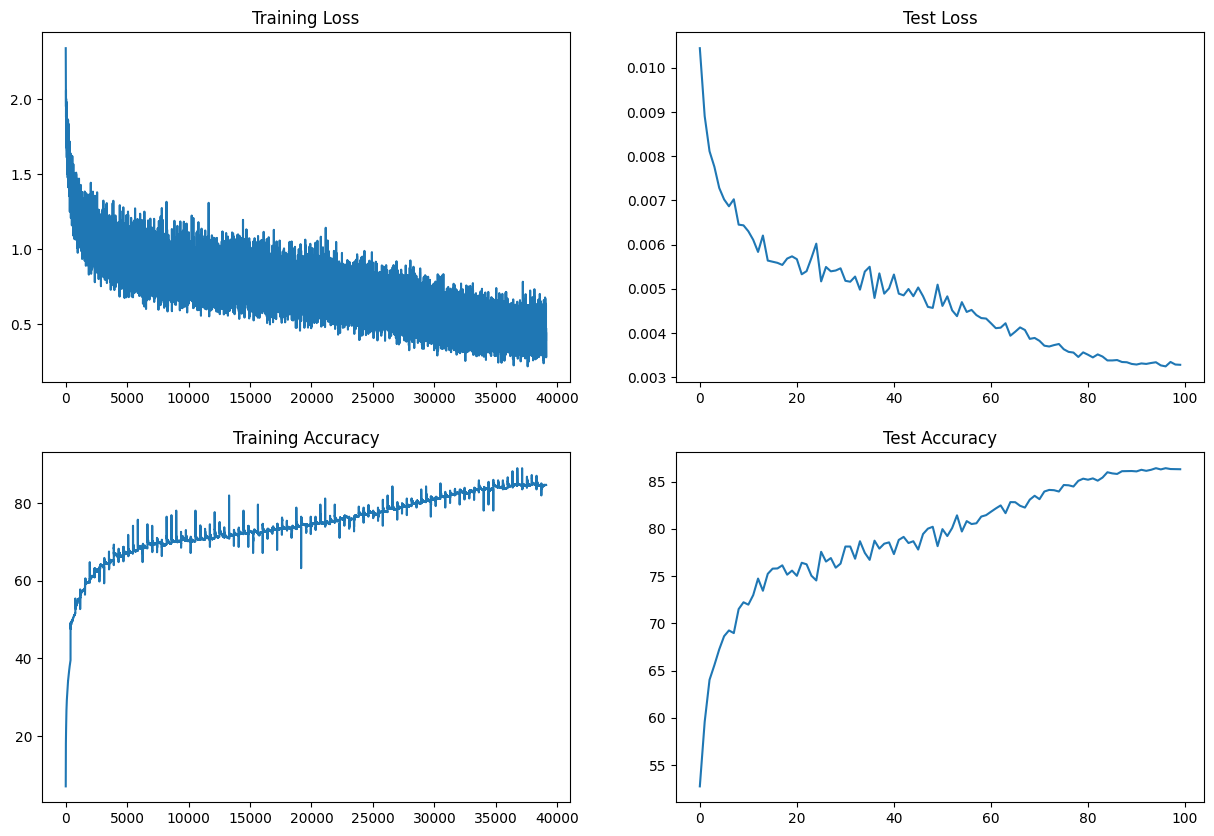

In [11]:
show_accuracy_loss(train_losses, train_acc, test_losses, test_acc)

# Plotting miscalssified images after prediction

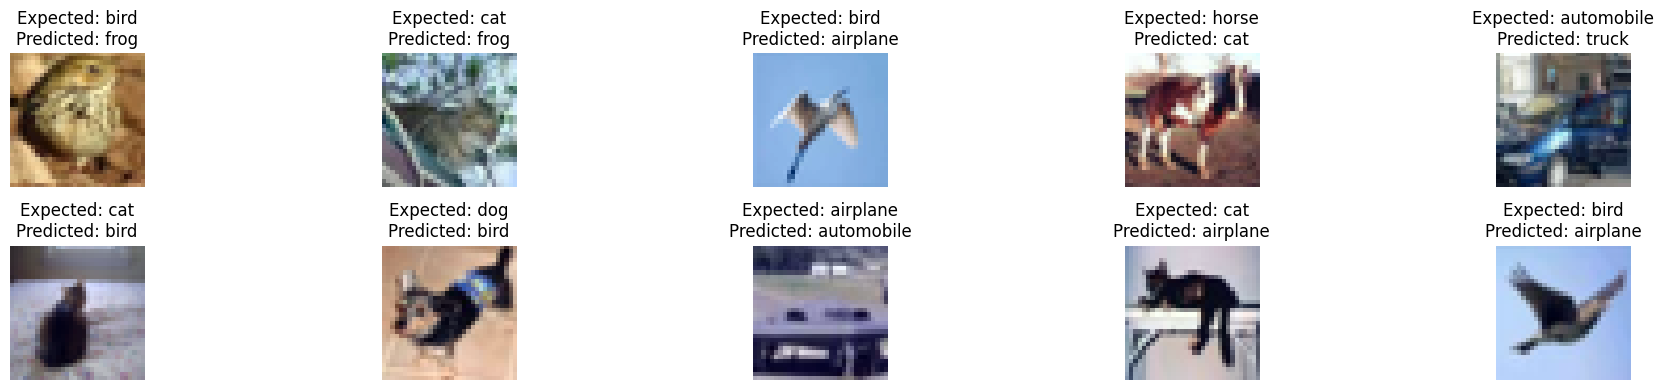

In [12]:
show_misclassified_img(missed_images, missed_labels, missed_predictions, classes)

# Model Graph

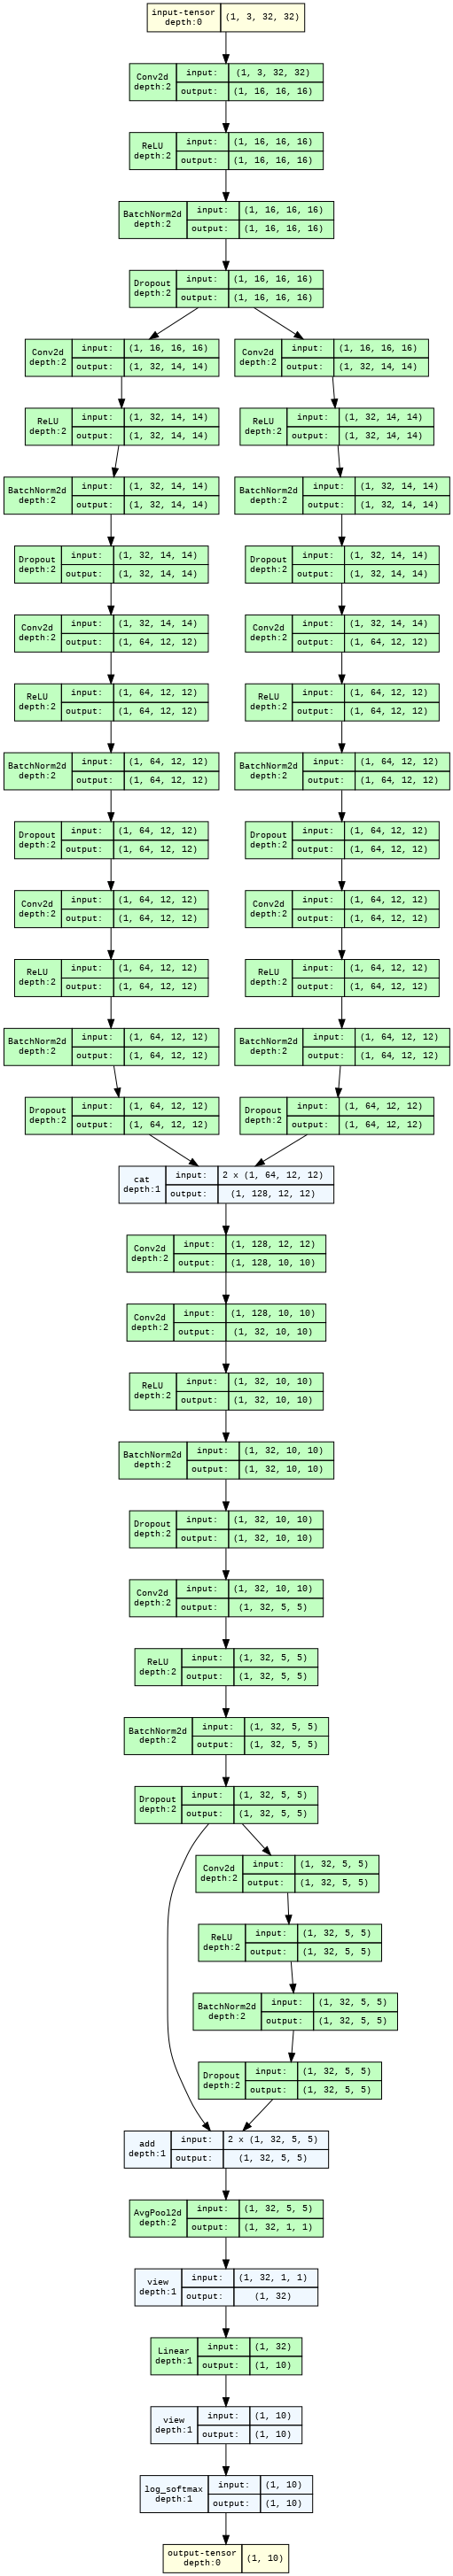

In [13]:
import torchvision
!pip install torchview
from torchview import draw_graph
import graphviz
graphviz.set_jupyter_format('png')
model_graph = draw_graph(Net(), input_size=(1,3,32,32), expand_nested=False)
model_graph.visual_graph

# Class wise Accuracy

In [14]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of airplane : 80 %
Accuracy of automobile : 94 %
Accuracy of  bird : 89 %
Accuracy of   cat : 54 %
Accuracy of  deer : 93 %
Accuracy of   dog : 60 %
Accuracy of  frog : 91 %
Accuracy of horse : 92 %
Accuracy of  ship : 96 %
Accuracy of truck : 94 %
